In [1]:
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2 

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/"

# Load FMP U2OS normalized data

In [4]:
# data_U2OS_Norm = pd.read_csv(input_path + "2023-04-11_Bioactives_U2OS_norm.csv")
file_U2OS_type = '/*[0-9]_' + 'FMP_U2OS_norm.csv'
files_U2OS = glob.glob(input_path + file_U2OS_type)

### gets latest file
max_file_U2OS = max(files_U2OS, key=os.path.getctime)

### load file
data_U2OS_Norm = pd.read_csv(max_file_U2OS)
data_U2OS_Norm.shape

(10629, 2984)

# Load FMP HepG2 normalized data

In [5]:
# data_HepG2_Norm = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_norm.csv")
file_HepG2_type = '/*[0-9]_' + 'FMP_HepG2_norm.csv'
files_HepG2 = glob.glob(input_path + file_HepG2_type)

### gets latest file
max_file_HepG2 = max(files_HepG2, key=os.path.getctime)

### load file
data_HepG2_Norm = pd.read_csv(max_file_HepG2)
data_HepG2_Norm.shape

(10697, 2984)

# Feature Selection

Modified from Carsten Beese

Variance frequency cut off 0.1

Variance unique cut off 0.1

Outlier cut off 100


Modified:
Corr Treshold 0.9

In [6]:
# U2OS feature reduction
print("Feature reduction with correlation threshold 0.9 and Outlier threshold 100")
U2OS_Reduced_Carsten_100_Mod = UTIL.feature_reduction(data_U2OS_Norm, 
                                         variance_freq_cut=0.1, 
                                         variance_unique_cut=0.1, 
                                         outlier_cutoff=100, 
                                         corr_threshold = 0.9, 
                                         print_stats = True)

Feature reduction with correlation threshold 0.9 and Outlier threshold 100
| Category           |   Original Features |   Variance Threshold |   % Variance |   Outlier Threshold |   % Outlier |   Correlation Threshold |   % Correlation |
|:-------------------|--------------------:|---------------------:|-------------:|--------------------:|------------:|------------------------:|----------------:|
| Total Features     |                2977 |                 2803 |         94.2 |                2071 |        69.6 |                     738 |            24.8 |
| Intensity          |                 180 |                  180 |        100   |                 125 |        69.4 |                      44 |            24.4 |
| Correlation        |                 180 |                  122 |         67.8 |                  99 |        55   |                      68 |            37.8 |
| AreaShape          |                 162 |                  155 |         95.7 |                 149 |      

In [7]:
# HepG2 feature reduction
print("Feature reduction with correlation threshold 0.9 and Outlier threshold 100")
HepG2_Reduced_Carsten_100_Mod = UTIL.feature_reduction(data_HepG2_Norm, 
                                         variance_freq_cut=0.1, 
                                         variance_unique_cut=0.1, 
                                         outlier_cutoff=100, 
                                         corr_threshold = 0.9, 
                                         print_stats = True)

Feature reduction with correlation threshold 0.9 and Outlier threshold 100
| Category           |   Original Features |   Variance Threshold |   % Variance |   Outlier Threshold |   % Outlier |   Correlation Threshold |   % Correlation |
|:-------------------|--------------------:|---------------------:|-------------:|--------------------:|------------:|------------------------:|----------------:|
| Total Features     |                2977 |                 2811 |         94.4 |                2177 |        73.1 |                     654 |            22   |
| Intensity          |                 180 |                  180 |        100   |                 149 |        82.8 |                      44 |            24.4 |
| Correlation        |                 180 |                  120 |         66.7 |                  99 |        55   |                      65 |            36.1 |
| AreaShape          |                 162 |                  154 |         95.1 |                 139 |      

In [8]:
df_HepG2_headers = pd.DataFrame(list(HepG2_Reduced_Carsten_100_Mod.columns.values))

filename_df_HepG2_headers = output_path + str(date.today()) + "_FMP_HepG2_Features.csv"
df_HepG2_headers.to_csv(filename_df_HepG2_headers, index = False)

In [9]:
df_U2OS_headers = pd.DataFrame(list(U2OS_Reduced_Carsten_100_Mod.columns.values))

filename_df_U2OS_headers = output_path + str(date.today()) + "_FMP_U2OS_Features.csv"
df_U2OS_headers.to_csv(filename_df_U2OS_headers, index = False)

# Consensus Feature reduction

In [10]:
## gets feature vector
Features_U2OS_Reduced_Carsten_100_Mod = UTIL.get_feature_vector(U2OS_Reduced_Carsten_100_Mod)
Features_U2OS_Reduced_Carsten_100_Mod.append("Metadata_Object_Count") 


U2OS_Norm_Reduced_Median = pycytominer.consensus(
        profiles = U2OS_Reduced_Carsten_100_Mod, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_U2OS_Reduced_Carsten_100_Mod, # (str, list) – The features to collapse, defaults to “infer”
)

In [11]:
# Moves position of Metadata_Object_Count column
U2OS_column_to_move = U2OS_Norm_Reduced_Median.pop("Metadata_Object_Count")
U2OS_Norm_Reduced_Median.insert(4, "Metadata_Object_Count", U2OS_column_to_move)

In [12]:
filename_U2OS_Norm_Reduced_Median = output_path + str(date.today()) + "_FMP_U2OS_norm_reduced_Median_Cell-Number.csv"
U2OS_Norm_Reduced_Median.to_csv(filename_U2OS_Norm_Reduced_Median, index = False)

In [13]:
## gets feature vector
Features_HepG2_Reduced_Carsten_100_Mod = UTIL.get_feature_vector(HepG2_Reduced_Carsten_100_Mod)
Features_HepG2_Reduced_Carsten_100_Mod.append("Metadata_Object_Count") 


HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Carsten_100_Mod, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Reduced_Carsten_100_Mod, # (str, list) – The features to collapse, defaults to “infer”
)

In [14]:
# Moves position of Metadata_Object_Count column
HepG2_column_to_move = HepG2_Norm_Reduced_Median.pop("Metadata_Object_Count")
HepG2_Norm_Reduced_Median.insert(4, "Metadata_Object_Count", HepG2_column_to_move)

In [15]:
filename_HepG2_Norm_Reduced_Median = output_path + str(date.today()) + "_FMP_HepG2_norm_reduced_Median_Cell-Number.csv"
HepG2_Norm_Reduced_Median.to_csv(filename_HepG2_Norm_Reduced_Median, index = False)

# Create Feature annotation for Profile Viz

In [16]:
U2OS_Norm_Reduced_Median_copy = U2OS_Norm_Reduced_Median.copy()
U2OS_Norm_Reduced_Median_copy.columns = U2OS_Norm_Reduced_Median_copy.columns.str.split('_', expand=True, n=2)

In [17]:
filename_U2OS_Norm_Reduced_Median_ProfileViz = output_path + "ProfileViz/" +  str(date.today()) + "_FMP_U2OS_norm_reduced_Median_ProfileViz.csv"
U2OS_Norm_Reduced_Median_copy.to_csv(filename_U2OS_Norm_Reduced_Median_ProfileViz, index = False)

In [18]:
HepG2_Norm_Reduced_Median_copy = HepG2_Norm_Reduced_Median.copy()
HepG2_Norm_Reduced_Median_copy.columns = HepG2_Norm_Reduced_Median_copy.columns.str.split('_', expand=True, n=2)
HepG2_Norm_Reduced_Median_copy.head()

Metadata                                                          Nuc  \
       EOS  Plate Concentration     Partner Object            AreaShape   
       NaN    NaN           NaN         NaN  Count BoundingBoxMaximum_Y   
0     DMSO  B1001             0  Bioactives  925.5                  0.0   
1     DMSO  B1002             0  Bioactives  929.0                  0.0   
2     DMSO  B1003             0  Bioactives  895.5                  0.0   
3     DMSO  B1004             0  Bioactives  914.5                  0.0   
4     DMSO  B1005             0  Bioactives  937.0                  0.0   

                                                    ...  \
                                                    ...   
  Compactness Eccentricity Extent MaxFeretDiameter  ...   
0         0.0          0.0    0.0              0.0  ...   
1         0.0          0.0    0.0              0.0  ...   
2         0.0          0.0    0.0              0.0  ...   
3         0.0          0.0    0.0              0.0  ...   
4         0.0          0.0    0.0              0.0  ...   

                                 Cyto                           \
                              Texture                            
  InverseDifferenceMoment_ER_5_03_256 SumAverage_AGP_10_02_256   
0                        0.000000e+00            -2.796374e-15   
1                       -2.399990e-15             0.000000e+00   
2                        0.000000e+00             0.000000e+00   
3                        0.000000e+00             0.000000e+00   
4                       -2.399990e-15             0.000000e+00   

                                                                             \
                                                                              
  SumAverage_DNA_10_01_256 SumAverage_DNA_10_02_256 SumAverage_DNA_3_01_256   
0                      0.0             0.000000e+00            0.000000e+00   
1                      0.0             0.000000e+00            0.000000e+00   
2                      0.0             2.199629e-15            0.000000e+00   
3                      0.0             0.000000e+00            0.000000e+00   
4                      0.0             0.000000e+00            6.300516e-15   

                                                                             \
                                                                              
  SumEntropy_DNA_10_03_256 SumEntropy_ER_3_00_256 SumVariance_DNA_10_00_256   
0             0.000000e+00           0.000000e+00              0.000000e+00   
1            -1.524999e-14           0.000000e+00              0.000000e+00   
2             0.000000e+00           0.000000e+00              0.000000e+00   
3             0.000000e+00           0.000000e+00              0.000000e+00   
4             3.700165e-15           5.999975e-15             -1.250085e-15   

                                                     
                                                     
  SumVariance_DNA_3_03_256 SumVariance_DNA_5_01_256  
0             0.000000e+00            -1.449795e-15  
1             0.000000e+00             0.000000e+00  
2            -3.949965e-15             0.000000e+00  
3             0.000000e+00             0.000000e+00  
4             0.000000e+00            -1.196959e-15  

[5 rows x 659 columns]

In [19]:
filename_HepG2_Norm_Reduced_Median_ProfileViz = output_path + "ProfileViz/" +  str(date.today()) + "_FMP_HepG2_norm_reduced_Median_ProfileViz.csv"
HepG2_Norm_Reduced_Median_copy.to_csv(filename_HepG2_Norm_Reduced_Median_ProfileViz, index = False)

## Create Overlapping features for Profile Viz

In [20]:
# add a column for cell type
U2OS_Norm_Reduced_Median['Metadata_Cell_type'] = 'U2OS'
U2OS_column_to_move = U2OS_Norm_Reduced_Median.pop('Metadata_Cell_type')
U2OS_Norm_Reduced_Median.insert(5, 'Metadata_Cell_type', U2OS_column_to_move)

HepG2_Norm_Reduced_Median['Metadata_Cell_type'] = 'HepG2'
HepG2_column_to_move = HepG2_Norm_Reduced_Median.pop('Metadata_Cell_type')
HepG2_Norm_Reduced_Median.insert(5, 'Metadata_Cell_type', HepG2_column_to_move)

In [21]:
# Get overlapping features
Features_U2OS_Norm_Reduced_Median = UTIL.get_feature_vector(U2OS_Norm_Reduced_Median)
Features_HepG2_Norm_Reduced_Median = UTIL.get_feature_vector(HepG2_Norm_Reduced_Median)

In [22]:
Feature_overlap = list(set(Features_U2OS_Norm_Reduced_Median) & set(Features_HepG2_Norm_Reduced_Median))

In [23]:
metadata_all  = UTIL.get_metadata_vector(U2OS_Norm_Reduced_Median)
columns_for_filter = metadata_all + Feature_overlap 

In [24]:
U2OS_Norm_Reduced_Median_Overlap = U2OS_Norm_Reduced_Median.loc[:, U2OS_Norm_Reduced_Median.columns.isin(columns_for_filter)].copy()
HepG2_Norm_Reduced_Median_Overlap = HepG2_Norm_Reduced_Median.loc[:, HepG2_Norm_Reduced_Median.columns.isin(columns_for_filter)].copy()
Overlap_Norm_Reduced_Median = pd.concat([U2OS_Norm_Reduced_Median_Overlap, HepG2_Norm_Reduced_Median_Overlap])

In [25]:
Overlap_Norm_Reduced_Median.columns = Overlap_Norm_Reduced_Median.columns.str.split('_', expand=True, n=2)

In [26]:
filename_Overlap_Norm_Reduced_Median_ProfileViz = output_path + "ProfileViz/" +  str(date.today()) + "_FMP_Overlap_Norm_Reduced_Median_ProfileViz.csv"
Overlap_Norm_Reduced_Median.to_csv(filename_Overlap_Norm_Reduced_Median_ProfileViz, index = False)

# Remove toxic compounds

Toxic conditions removed with threshold 233.61
Old shape (10629, 745)
New shape (10002, 745)


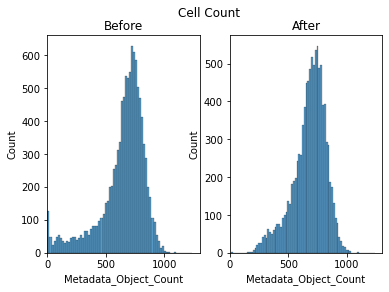

In [27]:
U2OS_Reduced_Tox, U2OS_Reduced_Tox_Cond = UTIL.remove_tox(
    U2OS_Reduced_Carsten_100_Mod, 
    key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration"], 
    SD_Threshold = 2.5,  
    plot_distribution = True)

In [28]:
len(U2OS_Reduced_Tox["Metadata_EOS"].unique())

2290

Toxic conditions removed with threshold 328.57
Old shape (10697, 661)
New shape (10337, 661)


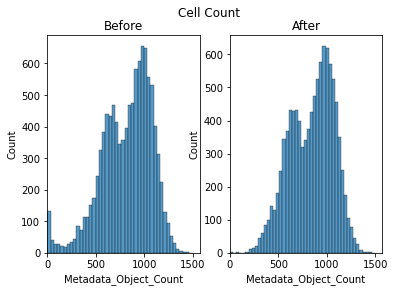

In [29]:
HepG2_Reduced_Tox, HepG2_Reduced_Tox_Cond = UTIL.remove_tox(
    HepG2_Reduced_Carsten_100_Mod, 
    key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration"], 
    SD_Threshold = 2.5,  
    plot_distribution = True)

In [30]:
len(HepG2_Reduced_Tox["Metadata_EOS"].unique())

2364

# Raw % replication

In [31]:
U2OS_replicating, U2OS_corr_replicating_df = UTIL.remove_non_reproducible(
    U2OS_Reduced_Tox, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  60.1 |
Nonreplicating conditions removed with threshold 0.6
Old shape (10002, 745)
New shape (6353, 745)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


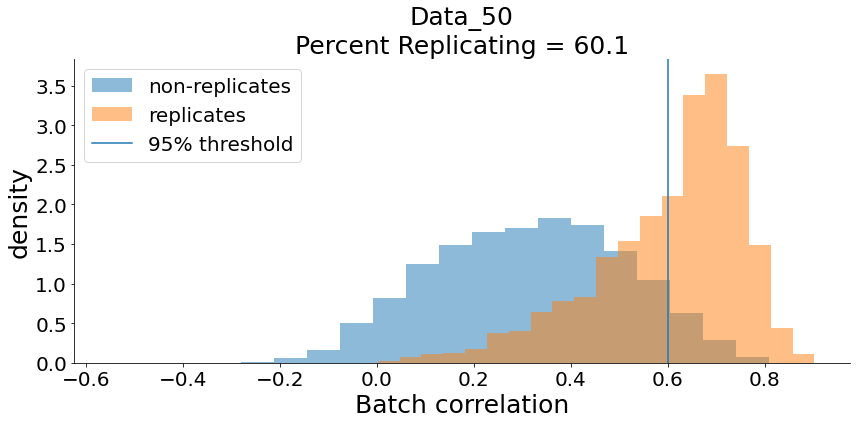

In [32]:
n_experiments = len(U2OS_corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(U2OS_corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(U2OS_corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(U2OS_corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{U2OS_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {U2OS_corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
plt.savefig(figure_path + str(date.today()) + "_FMP_U2OS_Percent_Replicating.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

In [33]:
HepG2_replicating, HepG2_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  61.8 |
Nonreplicating conditions removed with threshold 0.36
Old shape (10337, 661)
New shape (6734, 661)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


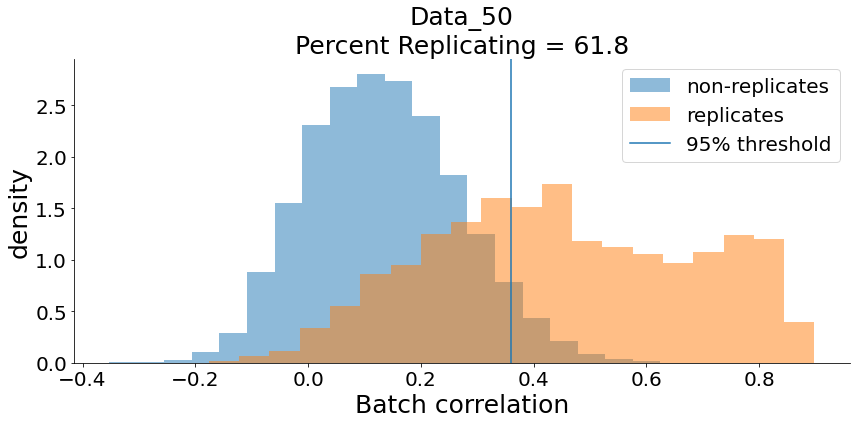

In [34]:
n_experiments = len(HepG2_corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(HepG2_corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{HepG2_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {HepG2_corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_FMP_HepG2_Percent_Replicating.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

# Compute Median for Induction

Tox filtered

Remove only toxic compounds

Non Replicating compounds are not removed


In [35]:
## gets feature vector
Features_U2OS_Norm_Reduced = UTIL.get_feature_vector(U2OS_Reduced_Tox)

U2OS_Norm_Reduced_Median = pycytominer.consensus(
        profiles = U2OS_Reduced_Tox, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_U2OS_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [36]:
len(U2OS_Norm_Reduced_Median["Metadata_EOS"].unique())

2290

In [37]:
## gets feature vector
Features_HepG2_Norm_Reduced = UTIL.get_feature_vector(HepG2_Reduced_Tox)

HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Tox, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [38]:
len(HepG2_Norm_Reduced_Median["Metadata_EOS"].unique())

2364

# Remove compounds with low acitivity

In [39]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"]

U2OS_active, U2OS_low_active = UTIL.remove_low_active(U2OS_Norm_Reduced_Median, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("U2OS active:", len(U2OS_active["Metadata_EOS"].unique()))
print("U2OS low-active:", len(U2OS_low_active["Metadata_EOS"].unique()))

U2OS active: 1600
U2OS low-active: 690


In [40]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"]

HepG2_active, HepG2_low_active = UTIL.remove_low_active(HepG2_Norm_Reduced_Median, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("HepG2 active:", len(HepG2_active["Metadata_EOS"].unique()))
print("HepG2 low-active:", len(HepG2_low_active["Metadata_EOS"].unique()))

HepG2 active: 861
HepG2 low-active: 1503


In [41]:
# take only unique EOS values (multiple DMSO)
U2OS_low_active = pd.DataFrame(U2OS_low_active["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])
HepG2_low_active = pd.DataFrame(HepG2_low_active["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

U2OS_HepG2_low_active = pd.merge(U2OS_low_active,
                                HepG2_low_active,
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

In [42]:
induction_for_venn = U2OS_HepG2_low_active['_merge'].value_counts()
induction_for_venn 

right_only    901
both          602
left_only      88
Name: _merge, dtype: int64

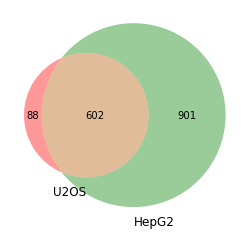

In [43]:
venn2(subsets = (induction_for_venn[2], 
                 induction_for_venn[0], 
                 induction_for_venn[1]), set_labels = ('U2OS', 'HepG2'))

plt.savefig(figure_path + str(date.today()) + "_FMP_Induction_Overlap.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

In [44]:
filename_HepG2_low_active = output_path +  str(date.today()) + "_FMP_HepG2_low-active.csv"
HepG2_low_active.to_csv(filename_HepG2_low_active, index = False)

In [45]:
filename_U2OS_low_active = output_path +  str(date.today()) + "_FMP_U2OS_low-active.csv"
U2OS_low_active.to_csv(filename_U2OS_low_active, index = False)

## Filter non active compounds from non consensus dataframe

In [46]:
U2OS_Reduced_Tox_active = U2OS_Reduced_Tox[
    (U2OS_Reduced_Tox['Metadata_EOS'].isin(U2OS_active['Metadata_EOS']))]

In [47]:
HepG2_Reduced_Tox_active = HepG2_Reduced_Tox[
    (HepG2_Reduced_Tox['Metadata_EOS'].isin(HepG2_active['Metadata_EOS']))]

# % Replicating after Induction filter

In [48]:
U2OS_active_replicating, U2OS_active_corr_replicating_df = UTIL.remove_non_reproducible(
    U2OS_Reduced_Tox_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  83.7 |
Nonreplicating conditions removed with threshold 0.6
Old shape (6436, 745)
New shape (5393, 745)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


In [49]:
filename_U2OS_Norm_Reduced_Filtered = output_path + str(date.today()) + "_FMP_U2OS_norm_reduced_filtered.csv"
U2OS_active_replicating.to_csv(filename_U2OS_Norm_Reduced_Filtered, index = False)

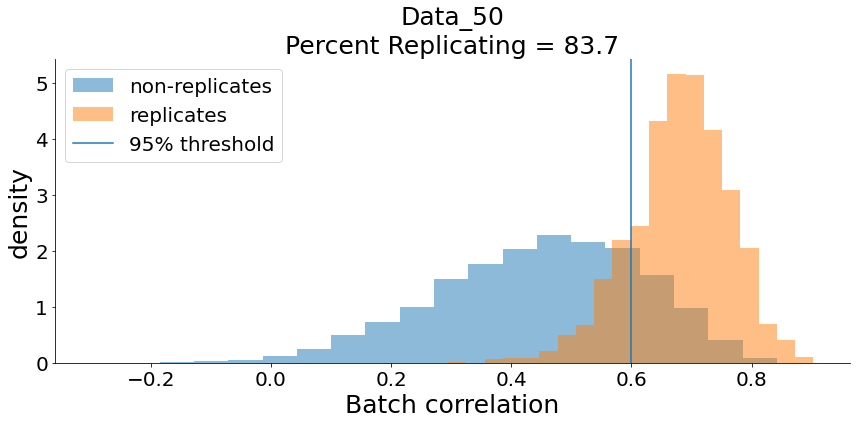

In [50]:
corr_replicating_df = U2OS_active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{U2OS_active_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_FMP_U2OS_Percent_Replicating_Induction_Filter.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

In [51]:
# save non replicating compounds
U2OS_non_replicating = U2OS_Reduced_Tox_active[
    (~U2OS_Reduced_Tox_active['Metadata_EOS'].isin(U2OS_active_replicating['Metadata_EOS']))]

U2OS_non_replicating_EOS = pd.DataFrame(U2OS_non_replicating["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_U2OS_non_replicating = output_path +  str(date.today()) + "_FMP_U2OS_non-replicating.csv"
U2OS_non_replicating_EOS.to_csv(filename_U2OS_non_replicating, index = False)

In [52]:
HepG2_active_replicating, HepG2_active_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  91.6 |
Nonreplicating conditions removed with threshold 0.48
Old shape (3547, 661)
New shape (3259, 661)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


In [53]:
filename_HepG2_Norm_Reduced_Filtered = output_path + str(date.today()) + "_FMP_HepG2_norm_reduced_filtered.csv"
HepG2_active_replicating.to_csv(filename_HepG2_Norm_Reduced_Filtered, index = False)

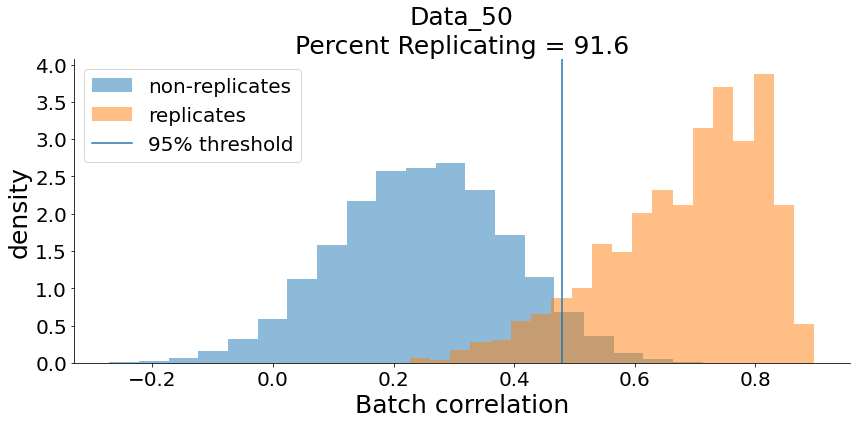

In [54]:
corr_replicating_df = HepG2_active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{HepG2_active_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_FMP_HepG2_Percent_Replicating_Induction_Filter.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

In [55]:
# save non replicating compounds
HepG2_non_replicating = HepG2_Reduced_Tox_active[
    (~HepG2_Reduced_Tox_active['Metadata_EOS'].isin(HepG2_active_replicating['Metadata_EOS']))]

HepG2_non_replicating_EOS = pd.DataFrame(HepG2_non_replicating["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_non_replicating = output_path +  str(date.today()) + "_FMP_HepG2_non-replicating.csv"
HepG2_non_replicating_EOS.to_csv(filename_HepG2_non_replicating, index = False)

# Consensus Tox, Induction, Replication Filter

In [56]:
## gets feature vector
Features_U2OS_Norm_Reduced_Filtered = UTIL.get_feature_vector(U2OS_active_replicating)

U2OS_Norm_Reduced_Filtered_Median = pycytominer.consensus(
        profiles = U2OS_active_replicating, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_U2OS_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [57]:
len(U2OS_Norm_Reduced_Filtered_Median["Metadata_EOS"].unique())

1339

In [58]:
filename_U2OS_Norm_Reduced_Filtered_Median = output_path + str(date.today()) + "_FMP_U2OS_norm_reduced_filtered_median.csv"
U2OS_Norm_Reduced_Filtered_Median.to_csv(filename_U2OS_Norm_Reduced_Filtered_Median, index = False)

In [59]:
## gets feature vector
Features_HepG2_Norm_Reduced_Filtered = UTIL.get_feature_vector(HepG2_active_replicating)

HepG2_Norm_Reduced_Filtered_Median = pycytominer.consensus(
        profiles = HepG2_active_replicating, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [60]:
len(HepG2_Norm_Reduced_Filtered_Median["Metadata_EOS"].unique())

789

In [61]:
filename_HepG2_Norm_Reduced_Filtered_Median = output_path + str(date.today()) + "_FMP_HepG2_norm_reduced_filtered_median.csv"
HepG2_Norm_Reduced_Filtered_Median.to_csv(filename_HepG2_Norm_Reduced_Filtered_Median, index = False)

# Get non-replicating compounds

In [62]:
U2OS_non_replicating_merge = pd.merge(U2OS_active,
                                U2OS_Norm_Reduced_Filtered_Median,
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

U2OS_non_replicating = U2OS_non_replicating_merge[
    U2OS_non_replicating_merge["_merge"] == 'left_only'].dropna(axis='columns')

In [63]:
U2OS_non_replicating_merge['_merge'].value_counts()

both          1387
left_only      261
right_only       0
Name: _merge, dtype: int64

In [64]:
HepG2_non_replicating_merge = pd.merge(HepG2_active,
                                HepG2_Norm_Reduced_Filtered_Median,
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

HepG2_non_replicating = HepG2_non_replicating_merge[
    HepG2_non_replicating_merge["_merge"] == 'left_only'].dropna(axis='columns')

In [65]:
HepG2_non_replicating_merge['_merge'].value_counts()

both          885
left_only      72
right_only      0
Name: _merge, dtype: int64

In [66]:
U2OS_HepG2_non_replicating = pd.merge(U2OS_non_replicating.drop(["_merge"], axis=1),
                                HepG2_non_replicating.drop(["_merge"], axis=1),
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

In [67]:
non_replicating_venn = U2OS_HepG2_non_replicating['_merge'].value_counts()

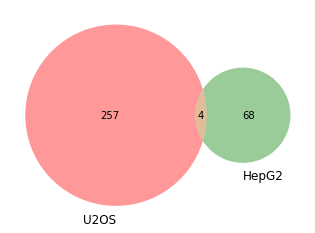

In [68]:
venn2(subsets = (non_replicating_venn[0], 
                 non_replicating_venn[1], 
                 non_replicating_venn[2]), set_labels = ('U2OS', 'HepG2'))

plt.savefig(figure_path + str(date.today()) + "_FMP_Non_Replicating_Overlap.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)